## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  17.980277   475.122693  0.429590  2.721004  1.384577
1  22.776196  1359.706662  0.631978  8.393091  1.674044
2  95.435340  1203.614643  0.358954  6.738557  1.205652
3  63.442746   904.682550  0.490734  7.468224  1.462010
4   9.458003  1208.582427  0.915252  9.949326  1.611365


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 0.9649347	total: 54ms	remaining: 54s
1:	learn: 0.9546420	total: 55.2ms	remaining: 27.5s
2:	learn: 0.9415596	total: 56.3ms	remaining: 18.7s
3:	learn: 0.9292013	total: 57.6ms	remaining: 14.4s
4:	learn: 0.9184652	total: 58.5ms	remaining: 11.6s
5:	learn: 0.9057655	total: 60.3ms	remaining: 9.98s
6:	learn: 0.8947717	total: 63.9ms	remaining: 9.07s
7:	learn: 0.8839916	total: 64.4ms	remaining: 7.99s
8:	learn: 0.8752779	total: 65.8ms	remaining: 7.25s
9:	learn: 0.8632039	total: 67.1ms	remaining: 6.64s
10:	learn: 0.8527546	total: 67.6ms	remaining: 6.08s
11:	learn: 0.8420268	total: 68.8ms	remaining: 5.67s
12:	learn: 0.8330711	total: 69.7ms	remaining: 5.29s
13:	learn: 0.8257589	total: 70.6ms	remaining: 4.97s
14:	learn: 0.8151552	total: 71.7ms	remaining: 4.71s
15:	learn: 0.8056756	total: 72.7ms	remaining: 4.47s
16:	learn: 0.7975137	total: 73.7ms	remaining: 4.26s
17:	learn: 0.7880306	total: 74.7ms	remaining: 4.08s
18:	learn: 0.7791892	total: 75.8ms	remaining: 3.91s
19:	learn: 0.7690595	total

122:	learn: 0.3124512	total: 151ms	remaining: 1.08s
123:	learn: 0.3104496	total: 153ms	remaining: 1.08s
124:	learn: 0.3082883	total: 155ms	remaining: 1.08s
125:	learn: 0.3065194	total: 156ms	remaining: 1.08s
126:	learn: 0.3043263	total: 157ms	remaining: 1.08s
127:	learn: 0.3026741	total: 158ms	remaining: 1.07s
128:	learn: 0.2998750	total: 159ms	remaining: 1.07s
129:	learn: 0.2979031	total: 160ms	remaining: 1.07s
130:	learn: 0.2955683	total: 160ms	remaining: 1.06s
131:	learn: 0.2938561	total: 161ms	remaining: 1.06s
132:	learn: 0.2922195	total: 162ms	remaining: 1.05s
133:	learn: 0.2904424	total: 163ms	remaining: 1.05s
134:	learn: 0.2884599	total: 163ms	remaining: 1.05s
135:	learn: 0.2865579	total: 164ms	remaining: 1.04s
136:	learn: 0.2847964	total: 165ms	remaining: 1.04s
137:	learn: 0.2828551	total: 166ms	remaining: 1.04s
138:	learn: 0.2809273	total: 167ms	remaining: 1.03s
139:	learn: 0.2789180	total: 168ms	remaining: 1.03s
140:	learn: 0.2773980	total: 168ms	remaining: 1.02s
141:	learn: 

169:	learn: 0.2352077	total: 196ms	remaining: 957ms
170:	learn: 0.2338722	total: 197ms	remaining: 957ms
171:	learn: 0.2330191	total: 199ms	remaining: 957ms
172:	learn: 0.2319699	total: 200ms	remaining: 954ms
173:	learn: 0.2307251	total: 201ms	remaining: 953ms
174:	learn: 0.2293750	total: 201ms	remaining: 950ms
175:	learn: 0.2282460	total: 203ms	remaining: 948ms
176:	learn: 0.2270236	total: 204ms	remaining: 947ms
177:	learn: 0.2259855	total: 205ms	remaining: 945ms
178:	learn: 0.2246891	total: 206ms	remaining: 944ms
179:	learn: 0.2232594	total: 207ms	remaining: 941ms
180:	learn: 0.2217364	total: 207ms	remaining: 938ms
181:	learn: 0.2203707	total: 208ms	remaining: 935ms
182:	learn: 0.2190978	total: 209ms	remaining: 932ms
183:	learn: 0.2181978	total: 209ms	remaining: 929ms
184:	learn: 0.2170085	total: 210ms	remaining: 925ms
185:	learn: 0.2155191	total: 211ms	remaining: 922ms
186:	learn: 0.2147061	total: 211ms	remaining: 919ms
187:	learn: 0.2134356	total: 212ms	remaining: 916ms
188:	learn: 

253:	learn: 0.1609003	total: 311ms	remaining: 913ms
254:	learn: 0.1604469	total: 313ms	remaining: 913ms
255:	learn: 0.1598726	total: 314ms	remaining: 913ms
256:	learn: 0.1592120	total: 316ms	remaining: 913ms
257:	learn: 0.1588602	total: 317ms	remaining: 912ms
258:	learn: 0.1583783	total: 318ms	remaining: 911ms
259:	learn: 0.1578982	total: 319ms	remaining: 909ms
260:	learn: 0.1575055	total: 320ms	remaining: 907ms
261:	learn: 0.1569272	total: 322ms	remaining: 908ms
262:	learn: 0.1564680	total: 324ms	remaining: 907ms
263:	learn: 0.1559196	total: 325ms	remaining: 906ms
264:	learn: 0.1555262	total: 326ms	remaining: 905ms
265:	learn: 0.1551978	total: 328ms	remaining: 905ms
266:	learn: 0.1546759	total: 328ms	remaining: 901ms
267:	learn: 0.1543070	total: 330ms	remaining: 901ms
268:	learn: 0.1532432	total: 331ms	remaining: 901ms
269:	learn: 0.1525179	total: 333ms	remaining: 901ms
270:	learn: 0.1521777	total: 335ms	remaining: 900ms
271:	learn: 0.1516944	total: 336ms	remaining: 898ms
272:	learn: 

283:	learn: 0.1467214	total: 351ms	remaining: 885ms
284:	learn: 0.1463794	total: 353ms	remaining: 885ms
285:	learn: 0.1460683	total: 355ms	remaining: 885ms
286:	learn: 0.1457555	total: 356ms	remaining: 884ms
287:	learn: 0.1455087	total: 358ms	remaining: 884ms
288:	learn: 0.1450892	total: 358ms	remaining: 882ms
289:	learn: 0.1447937	total: 359ms	remaining: 879ms
290:	learn: 0.1444819	total: 360ms	remaining: 877ms
291:	learn: 0.1440314	total: 362ms	remaining: 879ms
292:	learn: 0.1437266	total: 365ms	remaining: 880ms
293:	learn: 0.1435170	total: 368ms	remaining: 883ms
294:	learn: 0.1433109	total: 369ms	remaining: 882ms
295:	learn: 0.1430164	total: 370ms	remaining: 881ms
296:	learn: 0.1426875	total: 372ms	remaining: 882ms
297:	learn: 0.1425012	total: 375ms	remaining: 884ms
298:	learn: 0.1419420	total: 378ms	remaining: 886ms
299:	learn: 0.1416695	total: 380ms	remaining: 887ms
300:	learn: 0.1415014	total: 382ms	remaining: 886ms
301:	learn: 0.1413360	total: 384ms	remaining: 887ms
302:	learn: 

345:	learn: 0.1205607	total: 472ms	remaining: 892ms
346:	learn: 0.1200621	total: 479ms	remaining: 901ms
347:	learn: 0.1197445	total: 489ms	remaining: 917ms
348:	learn: 0.1192552	total: 490ms	remaining: 914ms
349:	learn: 0.1189450	total: 491ms	remaining: 911ms
350:	learn: 0.1182214	total: 491ms	remaining: 909ms
351:	learn: 0.1179091	total: 493ms	remaining: 907ms
352:	learn: 0.1177935	total: 494ms	remaining: 906ms


353:	learn: 0.1173203	total: 497ms	remaining: 906ms
354:	learn: 0.1166367	total: 499ms	remaining: 908ms
355:	learn: 0.1160012	total: 501ms	remaining: 906ms
356:	learn: 0.1158182	total: 503ms	remaining: 906ms
357:	learn: 0.1153620	total: 504ms	remaining: 904ms
358:	learn: 0.1149546	total: 505ms	remaining: 903ms
359:	learn: 0.1145545	total: 507ms	remaining: 902ms
360:	learn: 0.1141617	total: 509ms	remaining: 900ms
361:	learn: 0.1135065	total: 510ms	remaining: 899ms
362:	learn: 0.1129546	total: 513ms	remaining: 900ms
363:	learn: 0.1123371	total: 515ms	remaining: 900ms
364:	learn: 0.1117262	total: 517ms	remaining: 900ms
365:	learn: 0.1111391	total: 518ms	remaining: 898ms
366:	learn: 0.1105421	total: 520ms	remaining: 896ms
367:	learn: 0.1101148	total: 521ms	remaining: 895ms
368:	learn: 0.1095852	total: 524ms	remaining: 896ms
369:	learn: 0.1092177	total: 527ms	remaining: 898ms
370:	learn: 0.1088569	total: 530ms	remaining: 898ms
371:	learn: 0.1085025	total: 531ms	remaining: 896ms
372:	learn: 

419:	learn: 0.0959841	total: 607ms	remaining: 838ms
420:	learn: 0.0957055	total: 609ms	remaining: 837ms


421:	learn: 0.0954622	total: 612ms	remaining: 838ms
422:	learn: 0.0951883	total: 613ms	remaining: 836ms
423:	learn: 0.0951040	total: 614ms	remaining: 834ms
424:	learn: 0.0947322	total: 615ms	remaining: 832ms
425:	learn: 0.0946519	total: 616ms	remaining: 830ms
426:	learn: 0.0943562	total: 617ms	remaining: 828ms
427:	learn: 0.0940694	total: 619ms	remaining: 828ms
428:	learn: 0.0937080	total: 622ms	remaining: 828ms
429:	learn: 0.0932104	total: 625ms	remaining: 829ms
430:	learn: 0.0928921	total: 628ms	remaining: 830ms
431:	learn: 0.0928166	total: 630ms	remaining: 829ms
432:	learn: 0.0926354	total: 632ms	remaining: 828ms
433:	learn: 0.0924567	total: 634ms	remaining: 827ms
434:	learn: 0.0923361	total: 635ms	remaining: 825ms
435:	learn: 0.0920787	total: 638ms	remaining: 825ms
436:	learn: 0.0919550	total: 639ms	remaining: 824ms
437:	learn: 0.0918339	total: 641ms	remaining: 822ms
438:	learn: 0.0916121	total: 642ms	remaining: 821ms
439:	learn: 0.0914983	total: 644ms	remaining: 819ms
440:	learn: 

487:	learn: 0.0811043	total: 756ms	remaining: 794ms
488:	learn: 0.0808886	total: 759ms	remaining: 793ms
489:	learn: 0.0807704	total: 760ms	remaining: 791ms
490:	learn: 0.0804397	total: 763ms	remaining: 790ms
491:	learn: 0.0803725	total: 765ms	remaining: 790ms
492:	learn: 0.0803264	total: 766ms	remaining: 788ms
493:	learn: 0.0797604	total: 767ms	remaining: 786ms
494:	learn: 0.0794414	total: 769ms	remaining: 784ms
495:	learn: 0.0791201	total: 770ms	remaining: 783ms
496:	learn: 0.0790014	total: 772ms	remaining: 781ms
497:	learn: 0.0787794	total: 773ms	remaining: 779ms
498:	learn: 0.0787293	total: 774ms	remaining: 778ms


499:	learn: 0.0786662	total: 777ms	remaining: 777ms
500:	learn: 0.0786218	total: 779ms	remaining: 776ms
501:	learn: 0.0784062	total: 780ms	remaining: 774ms
502:	learn: 0.0783624	total: 781ms	remaining: 772ms
503:	learn: 0.0783193	total: 783ms	remaining: 770ms
504:	learn: 0.0781319	total: 784ms	remaining: 768ms
505:	learn: 0.0780678	total: 786ms	remaining: 767ms
506:	learn: 0.0779346	total: 788ms	remaining: 766ms
507:	learn: 0.0777544	total: 791ms	remaining: 766ms
508:	learn: 0.0773793	total: 792ms	remaining: 764ms
509:	learn: 0.0772032	total: 795ms	remaining: 764ms
510:	learn: 0.0770908	total: 797ms	remaining: 762ms
511:	learn: 0.0767154	total: 800ms	remaining: 762ms
512:	learn: 0.0764881	total: 803ms	remaining: 762ms
513:	learn: 0.0762666	total: 804ms	remaining: 761ms
514:	learn: 0.0759687	total: 806ms	remaining: 759ms
515:	learn: 0.0758608	total: 809ms	remaining: 759ms
516:	learn: 0.0756432	total: 810ms	remaining: 757ms
517:	learn: 0.0755954	total: 812ms	remaining: 755ms
518:	learn: 

573:	learn: 0.0669475	total: 922ms	remaining: 685ms
574:	learn: 0.0669035	total: 924ms	remaining: 683ms
575:	learn: 0.0665837	total: 926ms	remaining: 682ms
576:	learn: 0.0664926	total: 928ms	remaining: 680ms
577:	learn: 0.0663091	total: 929ms	remaining: 679ms
578:	learn: 0.0659990	total: 931ms	remaining: 677ms
579:	learn: 0.0659106	total: 932ms	remaining: 675ms
580:	learn: 0.0658510	total: 933ms	remaining: 673ms
581:	learn: 0.0657800	total: 934ms	remaining: 671ms
582:	learn: 0.0657367	total: 936ms	remaining: 669ms
583:	learn: 0.0655373	total: 939ms	remaining: 669ms
584:	learn: 0.0654945	total: 940ms	remaining: 667ms


585:	learn: 0.0651952	total: 944ms	remaining: 667ms
586:	learn: 0.0651101	total: 946ms	remaining: 665ms
587:	learn: 0.0649174	total: 947ms	remaining: 663ms
588:	learn: 0.0648751	total: 948ms	remaining: 662ms
589:	learn: 0.0647918	total: 950ms	remaining: 661ms
590:	learn: 0.0646026	total: 952ms	remaining: 659ms
591:	learn: 0.0645212	total: 955ms	remaining: 658ms
592:	learn: 0.0644144	total: 957ms	remaining: 657ms
593:	learn: 0.0643726	total: 958ms	remaining: 655ms
594:	learn: 0.0641870	total: 960ms	remaining: 653ms
595:	learn: 0.0640168	total: 962ms	remaining: 652ms
596:	learn: 0.0637329	total: 964ms	remaining: 651ms
597:	learn: 0.0634562	total: 965ms	remaining: 649ms
598:	learn: 0.0633779	total: 982ms	remaining: 657ms
599:	learn: 0.0631189	total: 984ms	remaining: 656ms
600:	learn: 0.0630423	total: 985ms	remaining: 654ms
601:	learn: 0.0627901	total: 986ms	remaining: 652ms
602:	learn: 0.0626891	total: 988ms	remaining: 651ms
603:	learn: 0.0624433	total: 993ms	remaining: 651ms
604:	learn: 

645:	learn: 0.0567408	total: 1.09s	remaining: 598ms
646:	learn: 0.0566974	total: 1.09s	remaining: 597ms
647:	learn: 0.0565814	total: 1.09s	remaining: 595ms
648:	learn: 0.0565386	total: 1.1s	remaining: 593ms
649:	learn: 0.0563759	total: 1.1s	remaining: 591ms
650:	learn: 0.0563337	total: 1.1s	remaining: 590ms
651:	learn: 0.0562543	total: 1.1s	remaining: 589ms


652:	learn: 0.0560618	total: 1.1s	remaining: 588ms
653:	learn: 0.0560201	total: 1.11s	remaining: 586ms
654:	learn: 0.0559414	total: 1.11s	remaining: 585ms
655:	learn: 0.0559003	total: 1.11s	remaining: 583ms
656:	learn: 0.0557130	total: 1.11s	remaining: 581ms
657:	learn: 0.0555810	total: 1.11s	remaining: 579ms
658:	learn: 0.0554645	total: 1.12s	remaining: 578ms
659:	learn: 0.0554239	total: 1.12s	remaining: 576ms
660:	learn: 0.0551925	total: 1.12s	remaining: 574ms
661:	learn: 0.0551525	total: 1.12s	remaining: 572ms
662:	learn: 0.0550754	total: 1.12s	remaining: 570ms
663:	learn: 0.0549622	total: 1.12s	remaining: 569ms
664:	learn: 0.0549227	total: 1.13s	remaining: 567ms
665:	learn: 0.0545317	total: 1.13s	remaining: 566ms
666:	learn: 0.0543581	total: 1.13s	remaining: 565ms
667:	learn: 0.0543199	total: 1.13s	remaining: 564ms
668:	learn: 0.0542823	total: 1.14s	remaining: 563ms
669:	learn: 0.0542452	total: 1.14s	remaining: 562ms
670:	learn: 0.0541058	total: 1.14s	remaining: 561ms
671:	learn: 0

732:	learn: 0.0456340	total: 1.25s	remaining: 457ms
733:	learn: 0.0455582	total: 1.27s	remaining: 459ms
734:	learn: 0.0453290	total: 1.27s	remaining: 457ms
735:	learn: 0.0452557	total: 1.27s	remaining: 455ms
736:	learn: 0.0452314	total: 1.27s	remaining: 454ms


737:	learn: 0.0451605	total: 1.27s	remaining: 452ms
738:	learn: 0.0449377	total: 1.28s	remaining: 451ms
739:	learn: 0.0448691	total: 1.28s	remaining: 449ms
740:	learn: 0.0447193	total: 1.28s	remaining: 447ms
741:	learn: 0.0446483	total: 1.28s	remaining: 445ms
742:	learn: 0.0445813	total: 1.28s	remaining: 443ms
743:	learn: 0.0445151	total: 1.28s	remaining: 442ms
744:	learn: 0.0444921	total: 1.28s	remaining: 440ms
745:	learn: 0.0444286	total: 1.28s	remaining: 438ms
746:	learn: 0.0443591	total: 1.29s	remaining: 436ms
747:	learn: 0.0442939	total: 1.29s	remaining: 434ms
748:	learn: 0.0442312	total: 1.29s	remaining: 432ms
749:	learn: 0.0441664	total: 1.29s	remaining: 431ms
750:	learn: 0.0440984	total: 1.29s	remaining: 429ms
751:	learn: 0.0439539	total: 1.29s	remaining: 427ms
752:	learn: 0.0438911	total: 1.3s	remaining: 425ms
753:	learn: 0.0438243	total: 1.3s	remaining: 424ms
754:	learn: 0.0436834	total: 1.3s	remaining: 422ms
755:	learn: 0.0436225	total: 1.31s	remaining: 422ms
756:	learn: 0.0

789:	learn: 0.0414728	total: 1.39s	remaining: 369ms
790:	learn: 0.0412079	total: 1.39s	remaining: 367ms
791:	learn: 0.0411573	total: 1.39s	remaining: 366ms
792:	learn: 0.0411378	total: 1.4s	remaining: 364ms
793:	learn: 0.0409829	total: 1.4s	remaining: 362ms
794:	learn: 0.0408550	total: 1.4s	remaining: 360ms
795:	learn: 0.0408057	total: 1.4s	remaining: 358ms


796:	learn: 0.0406553	total: 1.4s	remaining: 356ms
797:	learn: 0.0404632	total: 1.4s	remaining: 355ms
798:	learn: 0.0404152	total: 1.4s	remaining: 353ms
799:	learn: 0.0402288	total: 1.4s	remaining: 351ms
800:	learn: 0.0401465	total: 1.41s	remaining: 350ms
801:	learn: 0.0400996	total: 1.41s	remaining: 348ms
802:	learn: 0.0399957	total: 1.41s	remaining: 346ms
803:	learn: 0.0398025	total: 1.41s	remaining: 344ms
804:	learn: 0.0396571	total: 1.41s	remaining: 342ms
805:	learn: 0.0395123	total: 1.41s	remaining: 340ms
806:	learn: 0.0393256	total: 1.42s	remaining: 339ms
807:	learn: 0.0393065	total: 1.42s	remaining: 337ms
808:	learn: 0.0392617	total: 1.42s	remaining: 335ms
809:	learn: 0.0392175	total: 1.42s	remaining: 333ms
810:	learn: 0.0391987	total: 1.42s	remaining: 331ms
811:	learn: 0.0390985	total: 1.42s	remaining: 329ms
812:	learn: 0.0389600	total: 1.42s	remaining: 328ms
813:	learn: 0.0388364	total: 1.43s	remaining: 326ms
814:	learn: 0.0387025	total: 1.43s	remaining: 324ms
815:	learn: 0.03

907:	learn: 0.0319177	total: 1.55s	remaining: 157ms
908:	learn: 0.0318906	total: 1.55s	remaining: 156ms
909:	learn: 0.0318637	total: 1.55s	remaining: 154ms
910:	learn: 0.0317350	total: 1.55s	remaining: 152ms
911:	learn: 0.0316438	total: 1.56s	remaining: 150ms
912:	learn: 0.0315450	total: 1.56s	remaining: 148ms
913:	learn: 0.0315243	total: 1.56s	remaining: 147ms
914:	learn: 0.0315039	total: 1.56s	remaining: 145ms
915:	learn: 0.0314838	total: 1.56s	remaining: 143ms


916:	learn: 0.0314367	total: 1.56s	remaining: 142ms
917:	learn: 0.0314169	total: 1.57s	remaining: 140ms
918:	learn: 0.0312837	total: 1.57s	remaining: 138ms
919:	learn: 0.0312623	total: 1.57s	remaining: 136ms
920:	learn: 0.0312162	total: 1.57s	remaining: 135ms
921:	learn: 0.0311966	total: 1.57s	remaining: 133ms
922:	learn: 0.0311701	total: 1.57s	remaining: 131ms
923:	learn: 0.0311012	total: 1.57s	remaining: 130ms
924:	learn: 0.0310820	total: 1.58s	remaining: 128ms
925:	learn: 0.0309904	total: 1.58s	remaining: 126ms
926:	learn: 0.0309645	total: 1.58s	remaining: 124ms
927:	learn: 0.0308350	total: 1.58s	remaining: 123ms
928:	learn: 0.0307566	total: 1.58s	remaining: 121ms
929:	learn: 0.0307310	total: 1.58s	remaining: 119ms
930:	learn: 0.0306444	total: 1.58s	remaining: 118ms
931:	learn: 0.0306255	total: 1.59s	remaining: 116ms
932:	learn: 0.0306069	total: 1.59s	remaining: 114ms
933:	learn: 0.0305818	total: 1.59s	remaining: 112ms
934:	learn: 0.0305245	total: 1.59s	remaining: 111ms
935:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3488534694612889


ABC Pre-generator MAE 0.8799023964812529


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

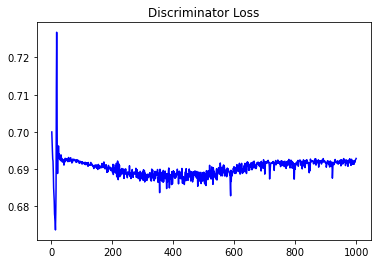

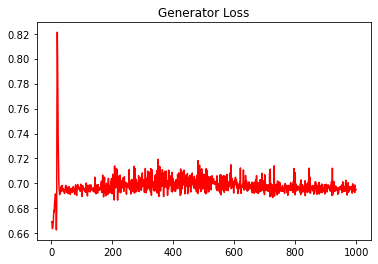

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.3707175785750151


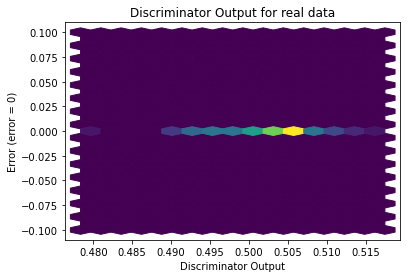

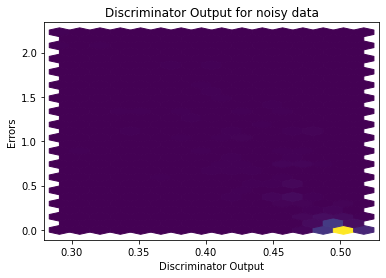

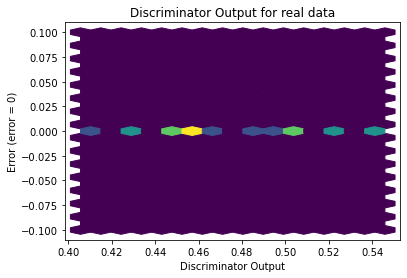

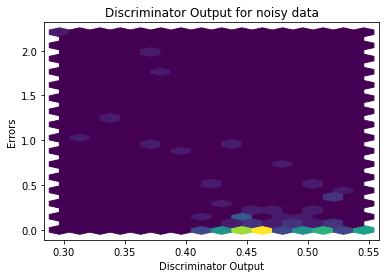

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

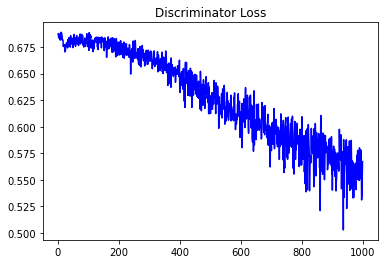

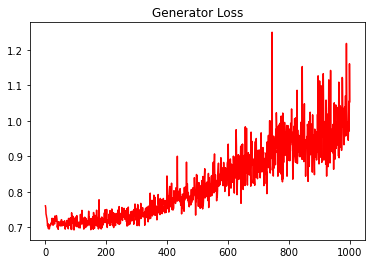

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.34824859938398006


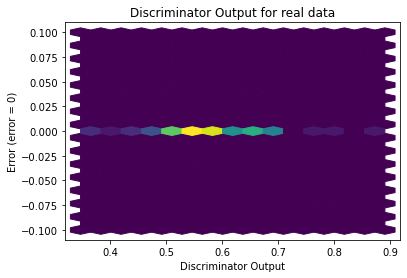

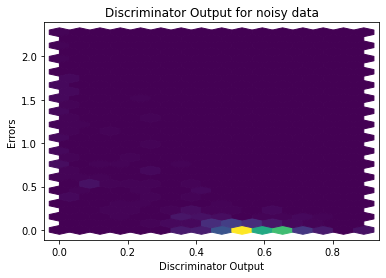

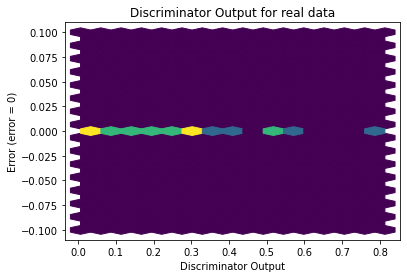

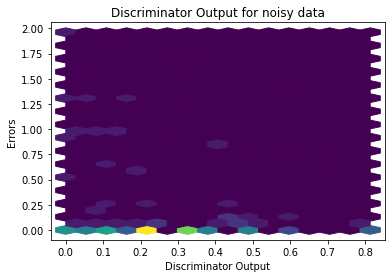

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


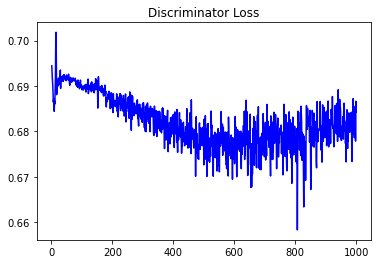

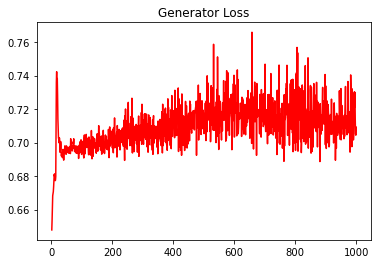

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.4226057527661324


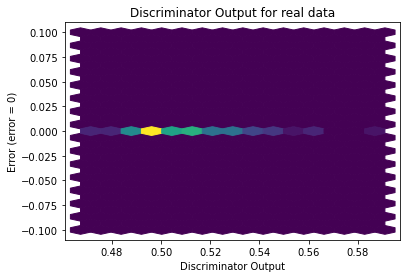

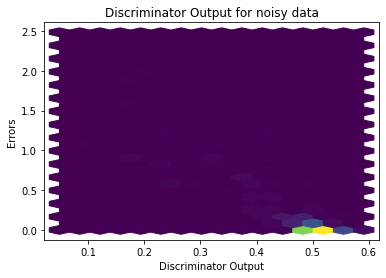

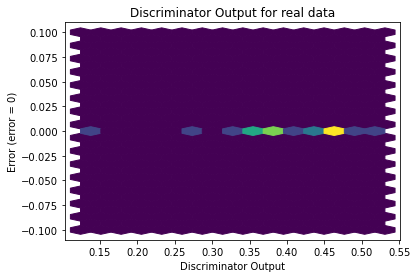

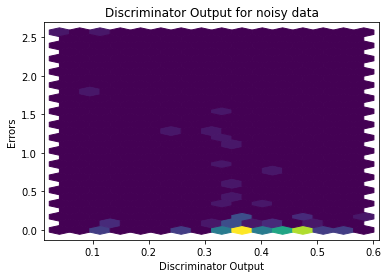

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


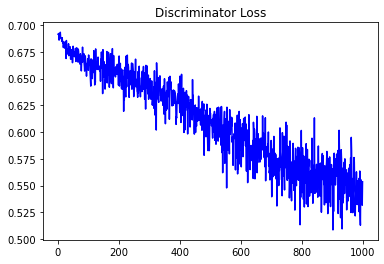

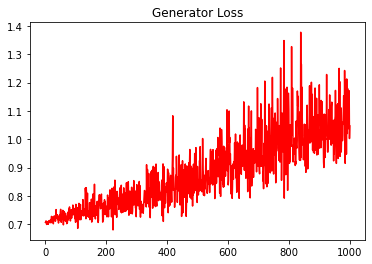

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.4148576927143149


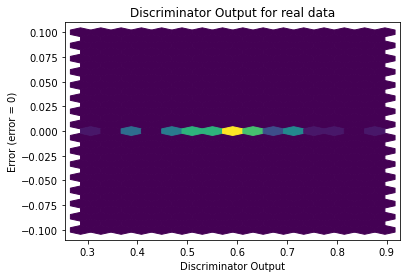

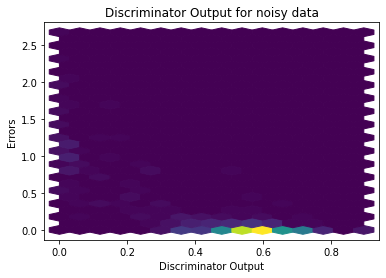

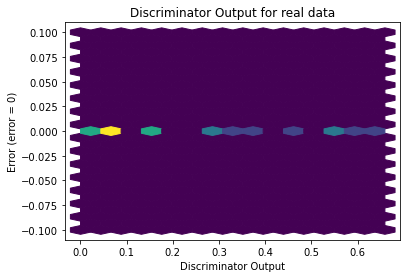

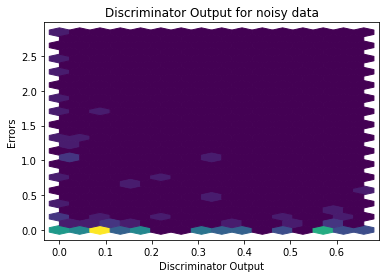

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9094]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7886]], requires_grad=True)
